## Luis Eduardo Jiménez del Muro - 03/09/2024
---

# Quiz 2, estadísticos y visualizaciones

Contexto: 'Floating Pandas, Inc.' es una empresa tecnológica innovadora que ofrece una plataforma de meditación y bienestar personalizada. El servicio se basa en una suscripción mensual de $10.80, proporcionando acceso a una variedad de meditaciones guiadas, ejercicios de mindfulness y herramientas de gestión del estrés adaptadas a las necesidades individuales de los usuarios. Esta tarifa permite a la empresa mantener una calidad alta en el contenido ofrecido y asegurar la actualización constante de su plataforma.

'Floating Pandas, Inc.' ha observado variaciones en la retención de clientes y busca identificar factores clave que podrían estar influyendo en este aspecto. La empresa está interesada en entender que es lo que esta afectando la relación a largo plazo con ellos así como esto impacta en el LTV esperado de sus clientes a 2 años.

Datos disponibles: .

Actividad 1):

- Objetivo: Identificar y visualizar factores que afectan la retención de clientes.
- Actividad: Utiliza gráficos para explorar la relación entre el NPS, los segmentos de clientes, y su Lifespan. Investiga si hay patrones o tendencias claras.
- Recomendación: Basándote en tus hallazgos, propone acciones específicas que 'Floating Pandas, Inc.' podría implementar para mejorar la retención y aumentar el LTV esperado de sus clientes.

Actividad 2):

Dada tu previa recomendación, ahora 'Floating Pandas, Inc.' está revisando su estrategia de asignación de recursos de marketing para maximizar el retorno sobre la inversión en diferentes segmentos de clientes.

- Objetivo: Analizar y comparar la efectividad del gasto en marketing en diferentes segmentos de clientes.
- Tarea: Calcula y visualiza cómo varía el CAC y el LTV a través del tiempo por segmento. Identifica cuáles segmentos ofrecen el mayor retorno sobre la inversión y cuáles podrían estar sub-optimizados.
- Recomendación: Formula estrategias de realineación de la inversión en marketing basadas en los datos analizados para optimizar los retornos futuros.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Actividad 1

In [2]:
data = pd.read_csv('customer_data.csv')
data.head()

,Customer_ID,Acquisition_Month,Segment,NPS_Score,Expected_Lifespan_Months,CAC,Technical_Issues,Expected_LTV_in_Two_Years
0,1,2022-01-31,Mid-Career,3,0,41.173062,2,0
1,2,2022-01-31,Young Professional,6,5,41.173062,1,54
2,3,2022-01-31,Mid-Career,5,22,41.173062,0,237
3,4,2022-01-31,Mid-Career,8,15,41.173062,2,162
4,5,2022-01-31,Young Professional,10,32,41.173062,0,259


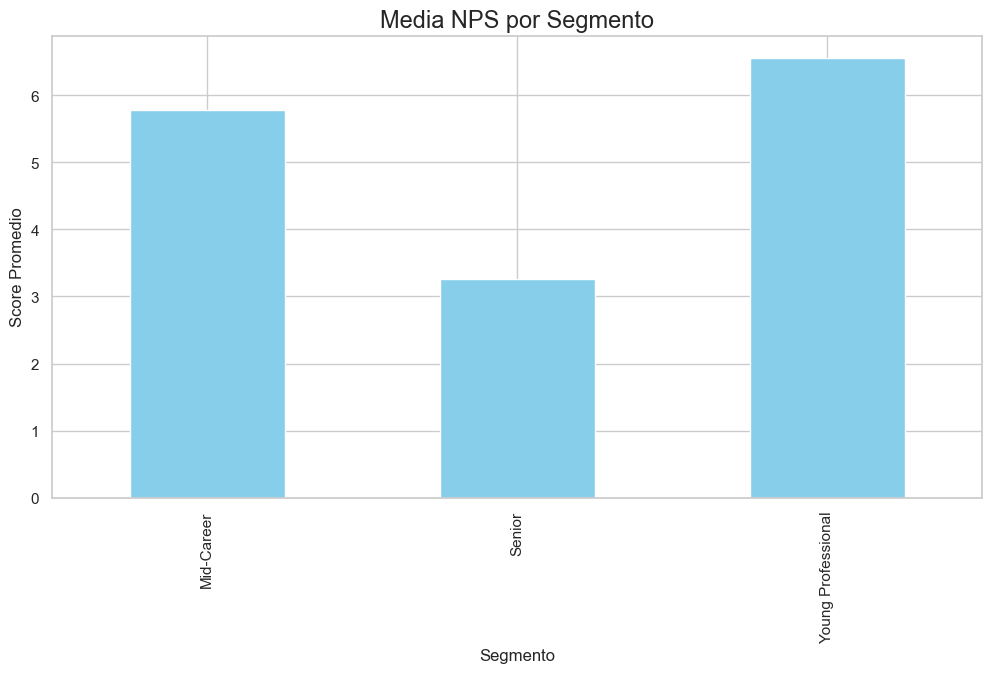

In [4]:
data.groupby('Segment')['NPS_Score'].mean().plot(kind='bar', color='skyblue')
plt.title('Media NPS por Segmento', fontsize=17)
plt.xlabel('Segmento')
plt.ylabel('Score Promedio')
plt.show()

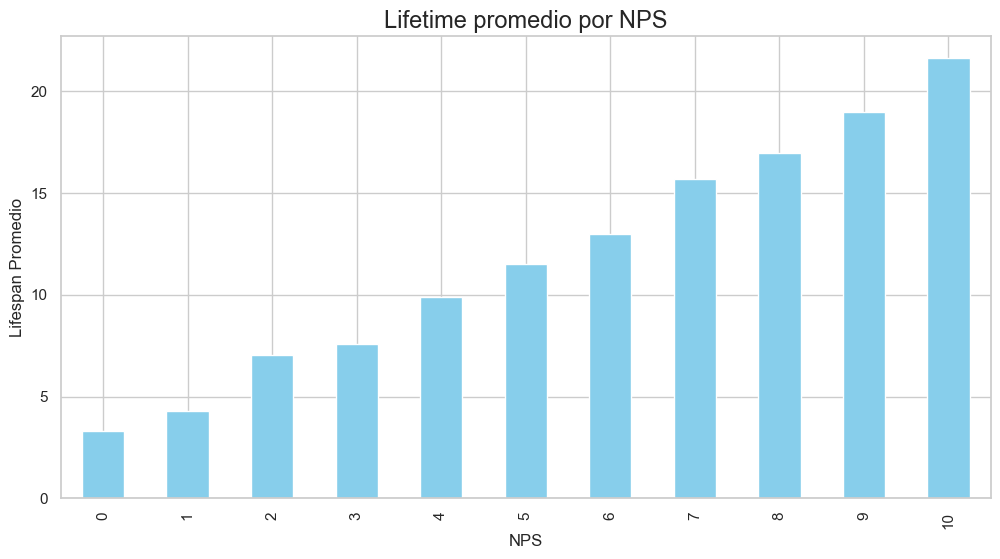

In [10]:
data.groupby('NPS_Score')['Expected_Lifespan_Months'].mean().plot(kind='bar', color='skyblue')
plt.title('Lifetime promedio por NPS', fontsize=17)
plt.xlabel('NPS')
plt.ylabel('Lifespan Promedio')
plt.show()

## Actividad 2

C:\Users\epile\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\epile\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


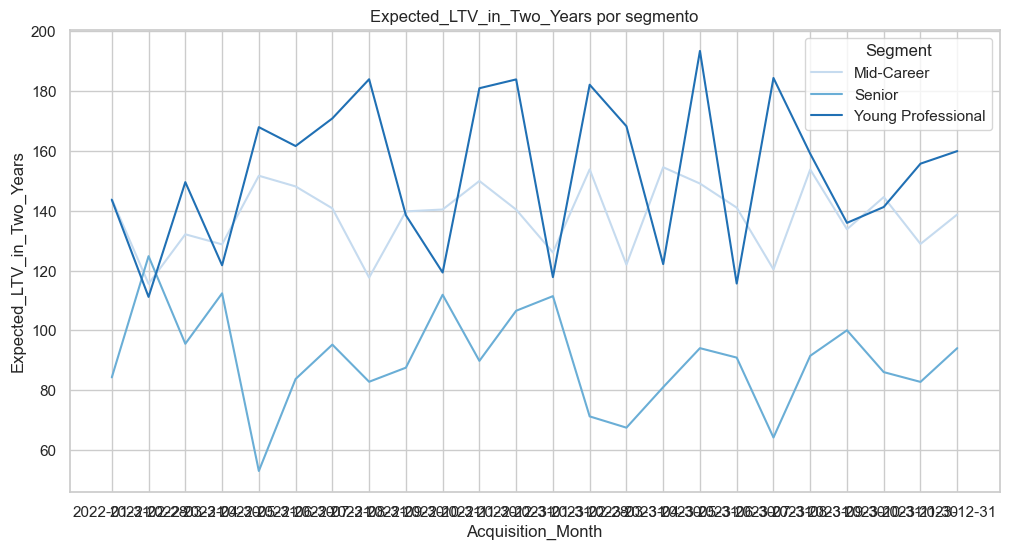

In [31]:
data2 = data.groupby(['Acquisition_Month', 'Segment'])['Expected_LTV_in_Two_Years'].mean().reset_index()
sns.lineplot(x='Acquisition_Month', y='Expected_LTV_in_Two_Years', data=data2, hue='Segment', palette='Blues')
plt.title('Expected_LTV_in_Two_Years por segmento')
plt.show()